In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 2011
merged2011=pd.read_csv('./datasets2011/Merged.csv')
pca2011=pd.read_csv('./datasets2011/PCA_2011.csv')
umap2011=pd.read_csv('./datasets2011/UMAP_2011.csv')

# 2021
merged2021=pd.read_csv('./datasets2021/Merged.csv')
pca2021=pd.read_csv('./datasets2021/PCA_2021.csv')
umap2021=pd.read_csv('./datasets2021/UMAP_2021.csv')

In [3]:
# merge 2011 data:merged2011, pca2011, umap2011 by geography
#rename geography code to geography_code for merged2011 and merged2021
merged2011.rename(columns={'geography code':'geography_code'},inplace=True)
merged2021.rename(columns={'geography code':'geography_code'},inplace=True)

# 重新执行合并操作
merged_all_2011 = pd.merge(merged2011, pca2011, on='geography_code', how='outer')
merged_all_2011 = pd.merge(merged_all_2011, umap2011, on=['geography_code'], how='outer')

merged_all_2021 = pd.merge(merged2021, pca2021, on='geography_code', how='outer')
merged_all_2021 = pd.merge(merged_all_2021, umap2021, on=['geography_code'], how='outer')


In [4]:
merged_all_2021.drop(columns=['geography_y','geography'],inplace=True)
merged_all_2021.rename(columns={'geography_x':'geography'},inplace=True)

merged_all_2011.drop(columns=['geography_y','geography'],inplace=True)
merged_all_2011.rename(columns={'geography_x':'geography'},inplace=True)

In [59]:
# # 2011
# umap_2011= pd.read_csv('./datasets2011/2011scatter_umap_cluster.csv')
# # 2021
# umap_2021= pd.read_csv('./datasets2021/2021scatter_umap_cluster.csv')

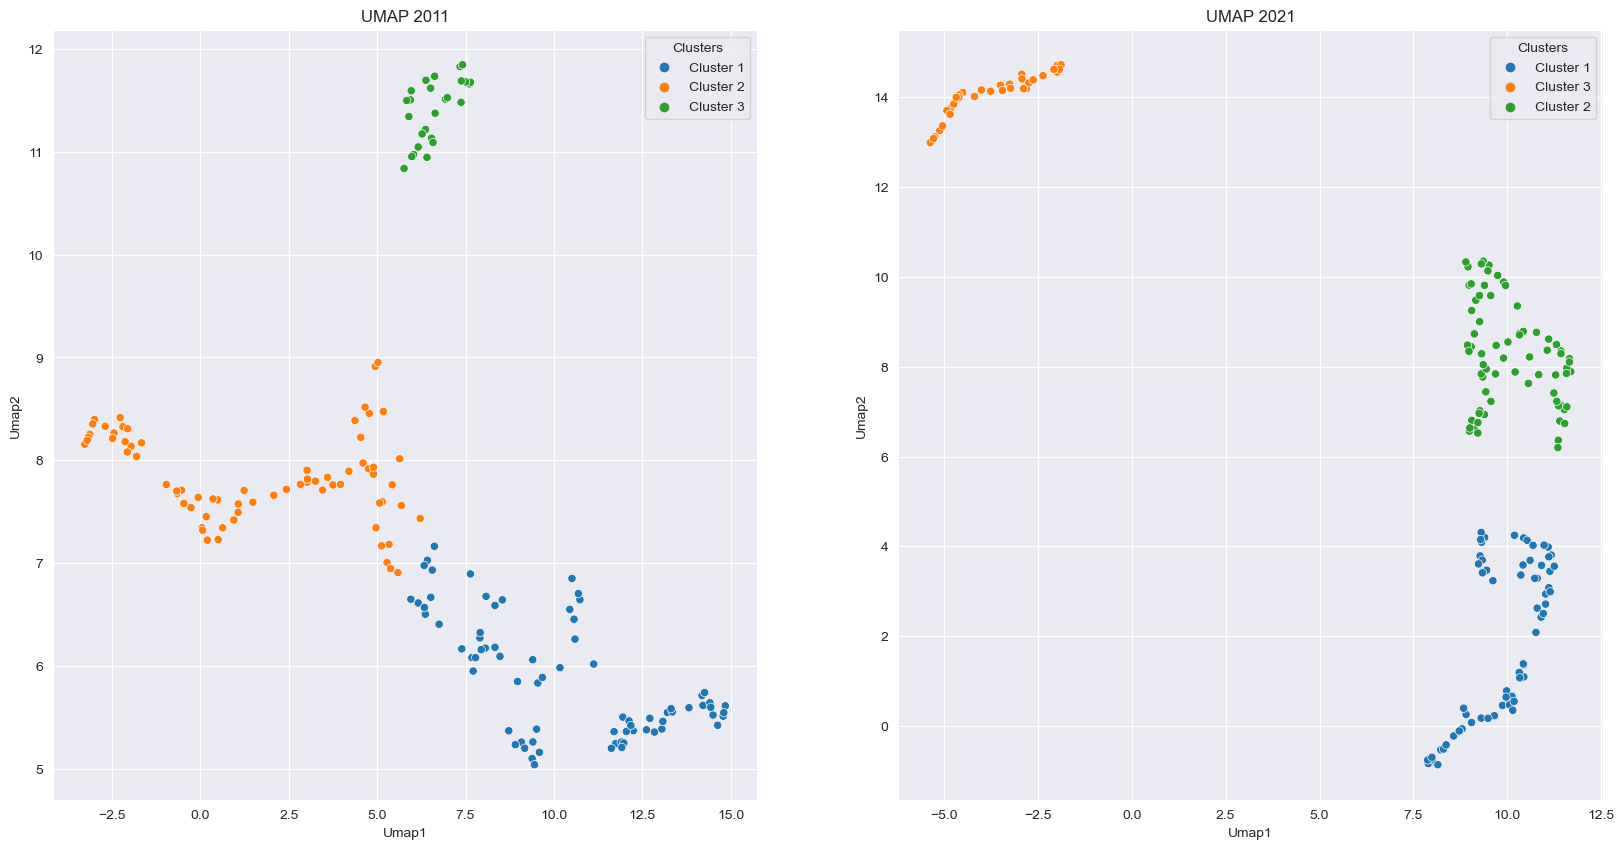

In [63]:
# # scatter plot for 2011 and 2021
# fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# sns.scatterplot(data=umap_2011, x='Umap1', y='Umap2', hue='Clusters', palette='tab10', ax=ax[0])
# sns.scatterplot(data=umap_2021, x='Umap1', y='Umap2', hue='Clusters', palette='tab10', ax=ax[1])
# ax[0].set_title('UMAP 2011')
# ax[1].set_title('UMAP 2021')
# plt.show()

In [7]:
columns_of_interest = ['geography','geography_code',
    'Age: 0-14', 'Age: 15-24', 'Age: 25-44', 'Age: 45-64', 'Age: 65+', 
    'Qualification: No', 'Qualification: Level 1', 'Qualification: Level 2', 
    'Qualification: Apprenticeship', 'Qualification: Level 3', 'Qualification: Level 4 and above', 'Qualification: Other',
     'All_Occupation: Managers, directors and senior officials', 
    'All_Occupation: Professional occupations', 'All_Occupation: Associate professional and technical occupations', 
    'All_Occupation: Administrative and secretarial occupations', 'All_Occupation: Skilled trades occupations', 
    'All_Occupation: Caring, leisure and other service occupations', 'All_Occupation: Sales and customer service occupations', 
    'All_Occupation: Process, plant and machine operatives', 'All_Occupation: Elementary occupations','PC1','PC2','UMAP1','UMAP2','cluster'
]
merged_2011_cluster2 = merged_all_2011[columns_of_interest]
merged_2021_cluster2 = merged_all_2021[columns_of_interest]

In [10]:
merged_2011_cluster2.to_csv('./datasets2011/2011_projection_cluster_nohealth.csv',index=False)
merged_2021_cluster2.to_csv('./datasets2021/2021_projection_cluster_nohealth.csv',index=False)

In [96]:
# 检测2011和2021merged cluster2的geography是否一致
merged_2011_cluster2['geography'].equals(merged_2021_cluster2['geography'])

False

In [102]:
# 将两个数据的geography列提取到一个新的dataframe中
df_geography = pd.DataFrame(merged_2011_cluster2['geography'])
df_geography['geography2'] = merged_2021_cluster2['geography']
df_geography

,geography,geography2
0,Darlington,Hartlepool
1,County Durham,Middlesbrough
2,Hartlepool,Redcar and Cleveland
3,Middlesbrough,Stockton-on-Tees
4,Northumberland,Darlington
...,...,...
169,Caerphilly,Torfaen
170,Blaenau Gwent,Monmouthshire
171,Torfaen,Newport
172,Monmouthshire,Powys


In [108]:
# 找出两列中唯一的地名
unique_geography = set(df_geography['geography'].unique())
unique_geography2 = set(df_geography['geography2'].unique())

# 找出只在geography2中独立出现的地名
unique_in_geography2 = unique_geography2 - unique_geography

# 创建一个映射表，用于根据geography列的顺序对geography2进行排序
# 如果geography2中的地名在geography列中没有找到，则保留并特别标记
geography_mapping = {geo: geo if geo in unique_geography else f"{geo} (独立出现)" for geo in unique_geography2}

# 根据geography列的顺序重新排序geography2列
# 使用map函数应用映射表，如果geography2中的地名没有在映射表中找到（理论上不可能），则返回原值
df_geography['sorted_geography2'] = df_geography['geography'].map(geography_mapping).fillna(df_geography['geography2'])

# 显示处理后的数据和独立出现的地名
df_geography[['geography', 'sorted_geography2']], unique_in_geography2


(          geography sorted_geography2
 0        Darlington        Darlington
 1     County Durham     County Durham
 2        Hartlepool        Hartlepool
 3     Middlesbrough     Middlesbrough
 4    Northumberland    Northumberland
 ..              ...               ...
 169      Caerphilly        Caerphilly
 170   Blaenau Gwent     Blaenau Gwent
 171         Torfaen           Torfaen
 172   Monmouthshire     Monmouthshire
 173         Newport           Newport
 
 [174 rows x 2 columns],
 {'Bournemouth, Christchurch and Poole',
  'North Northamptonshire',
  'West Northamptonshire'})

In [112]:
# 找出只在geography中独立出现的地名
unique_in_geography = unique_geography - unique_geography2

# 列出独立出现的地名
unique_in_geography


{'Bournemouth', 'Northamptonshire', 'Poole'}

In [113]:
# 找出只在geography2中独立出现的地名
unique_in_geography2 = unique_geography2 - unique_geography

# 列出独立出现的地名
unique_in_geography2

{'Bournemouth, Christchurch and Poole',
 'North Northamptonshire',
 'West Northamptonshire'}

2011--->2021
Bournemouth; Poole--->Bournemouth, Christchurch and Poole 
Northamptonshire--->North Northamptonshire, West Northamptonshire
确实，您提到的两个行政区划变化在2011年至2021年间发生了：

1. **Bournemouth, Poole 和 Christchurch 合并成一个区域（Bournemouth, Christchurch and Poole）**：根据《伯恩茅斯，克赖斯特彻奇和普尔（选举变化）命令2018》，这三个地区合并为一个单一管理区，名为Bournemouth, Christchurch and Poole，这一变化从2019年开始生效【10†source】。

2. **Northamptonshire 分裂为 North Northamptonshire 和 West Northamptonshire**：尽管我没有直接找到关于Northamptonshire分裂的具体立法或政府公告，但您所描述的变化与英国近年来地方政府重组的趋势相符。在实践中，这类重组通常旨在提高行政效率和地方治理质量。根据《2018年Bournemouth, Christchurch和Poole (选举变化)命令》和相关资料，可以看出英国在此期间确实进行了多项地方政府边界和管理结构的调整【10†source】。

这些变化反映了英国地方政府在响应社会经济变化和提高行政效率方面所作的努力。对于Bournemouth, Poole 和 Christchurch的合并，以及Northamptonshire的分裂，都是为了更好地管理地方事务和资源，提高服务质量。在处理数据分析或地理信息系统（GIS）工作时，了解这些变化对于确保使用最新和准确的行政区划数据至关重要。

## Combine all of the London boroughs into "London"
There are 33 London boroughs, and we want to combine them into a single "London" entry. 

In [13]:
import pandas as pd
df2011=pd.read_csv('./final_data/2011_projection_cluster_nohealth.csv')
df2021=pd.read_csv('./final_data/2021_projection_cluster_nohealth.csv')

In [14]:
df2011

,geography,geography_code,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,...,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations,PC1,PC2,UMAP1,UMAP2,cluster
0,Darlington,E06000005,18877,12479,27524,28245,18439,21179,11445,13568,...,5808,4832,5461,3562,5638,-3.679887,-0.296186,13.821828,5.592368,2
1,County Durham,E06000047,82102,68422,126778,143595,92345,116948,57032,67905,...,28753,23446,21042,23243,28090,3.219299,-1.195849,0.500625,7.228147,0
2,Hartlepool,E06000001,16543,12233,22491,25163,15598,22758,10057,11992,...,5126,4359,3880,3879,4756,-3.965647,-0.429153,14.215835,5.615273,2
3,Middlesbrough,E06000002,26192,21754,35179,34596,20691,33002,15053,16891,...,6437,6646,6077,5483,8055,-3.231317,-0.435133,11.904984,5.258532,2
4,Northumberland,E06000057,50025,34688,72343,95668,63304,62584,35791,43363,...,19038,15579,12688,11390,16222,-0.096415,-0.615000,3.024943,7.816561,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Caerphilly,W06000018,32734,22138,46875,47494,29565,45102,21459,23361,...,9890,7909,7123,8357,9821,-2.523754,-0.587628,9.172767,5.198359,2
170,Blaenau Gwent,W06000019,11626,9281,17853,18577,12477,20662,9035,8879,...,3718,3720,2467,3873,4419,-4.344830,-0.414255,14.437519,5.596550,2
171,Torfaen,W06000020,16034,11666,22283,24722,16370,21329,11094,12052,...,5378,4493,3781,4113,4976,-3.956118,-0.387049,14.191197,5.710870,2
172,Monmouthshire,W06000021,15092,10040,19790,27358,19043,15521,9446,11531,...,5545,3706,2946,2491,4784,-3.985114,-0.159492,14.248537,5.612833,2


In [10]:
# Define London boroughs
london_boroughs = [
    "City of London", 
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", 
    "Camden", "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney", 
    "Hammersmith and Fulham", "Haringey", "Harrow", "Havering", 
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea", 
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham", 
    "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

# Filter data to include only London boroughs
london_data = df2011[df2011['geography'].isin(london_boroughs)]
london_summary = london_data.select_dtypes(include=['number']).sum()
london_row = pd.DataFrame([london_summary], index=["London"])
london_row['geography'] = 'London'
london_row['geography_code'] = 'LONDON'

df2011 = pd.concat([df2011, london_row])
# df2011 = df2011[~df2011['geography'].isin(london_boroughs)]
df2011.drop(columns=['PC1','PC2','UMAP1','UMAP2','cluster'],inplace=True)

# 2021
london_data = df2021[df2021['geography'].isin(london_boroughs)]
london_summary = london_data.select_dtypes(include=['number']).sum()
london_row = pd.DataFrame([london_summary], index=["London"])
london_row['geography'] = 'London'
london_row['geography_code'] = 'LONDON'

df2021 = pd.concat([df2021, london_row])
# df2021 = df2021[~df2021['geography'].isin(london_boroughs)]
df2021.drop(columns=['PC1','PC2','UMAP1','UMAP2','cluster'],inplace=True)

df2011.to_csv('./final_data/raw_2011_boroughs.csv',index=False)
df2021.to_csv('./final_data/raw_2021_boroughs.csv',index=False)

In [5]:
london_boroughs = [
    "City of London", 
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", 
    "Camden", "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney", 
    "Hammersmith and Fulham", "Haringey", "Harrow", "Havering", 
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea", 
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham", 
    "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

# Filter data to include only London boroughs
london_data = population2021[population2021['geography'].isin(london_boroughs)]
london_data

,date,geography,geography code,Population Density: Persons per square kilometre; measures: Value
85,2021,Camden,E09000007,9640.9
86,2021,City of London,E09000001,2975.0
87,2021,Hackney,E09000012,13593.3
88,2021,Hammersmith and Fulham,E09000013,11161.1
89,2021,Haringey,E09000014,8930.2
90,2021,Islington,E09000019,14574.9
91,2021,Kensington and Chelsea,E09000020,11816.5
92,2021,Lambeth,E09000022,11839.1
93,2021,Lewisham,E09000023,8551.5
94,2021,Newham,E09000025,9690.1


### Changes between the 2011 and 2021 datasets (By Geography)

In [27]:
data_2011 = pd.read_csv('./final_data/clustered_2011.csv')
data_2021 = pd.read_csv('./final_data/clustered_2021.csv')

In [28]:
# Columns to keep (excluding PCA, UMAP, and Cluster columns)
columns_to_keep = ['geography', 'geography_code', 'Age: 0-14', 'Age: 15-24', 'Age: 25-44', 'Age: 45-64', 'Age: 65+',
                   'Qualification: No', 'Qualification: Level 1', 'Qualification: Level 2', 'Qualification: Apprenticeship',
                   'Qualification: Level 3', 'Qualification: Level 4 and above', 'Qualification: Other',
                   'All_Occupation: Managers, directors and senior officials', 'All_Occupation: Professional occupations',
                   'All_Occupation: Associate professional and technical occupations',
                   'All_Occupation: Administrative and secretarial occupations', 'All_Occupation: Skilled trades occupations',
                   'All_Occupation: Caring, leisure and other service occupations',
                   'All_Occupation: Sales and customer service occupations', 'All_Occupation: Process, plant and machine operatives',
                   'All_Occupation: Elementary occupations']

# Remove unnecessary columns
data_2011_clean = data_2011[columns_to_keep]
data_2021_clean = data_2021[columns_to_keep]

# Handling geographical changes:
# Merging Bournemouth and Poole in 2011 data
bournemouth_poole_2011 = data_2011_clean[data_2011_clean['geography'].isin(['Bournemouth', 'Poole'])]
bournemouth_poole_2011 = bournemouth_poole_2011.sum(numeric_only=True)
bournemouth_poole_2011['geography'] = 'Bournemouth, Christchurch and Poole'
bournemouth_poole_2011['geography_code'] = 'E06000058'  # New geo code for combined region

# Append this new row and remove the old ones
data_2011_clean = data_2011_clean[~data_2011_clean['geography'].isin(['Bournemouth', 'Poole'])]
data_2011_clean = pd.concat([data_2011_clean, pd.DataFrame([bournemouth_poole_2011])], ignore_index=True)


# Merging North Northamptonshire and West Northamptonshire in 2021 data to match Northamptonshire 2011
north_northamptonshire_2021 = data_2021_clean[data_2021_clean['geography'].isin(['North Northamptonshire', 'West Northamptonshire'])]
north_northamptonshire_2021 = north_northamptonshire_2021.sum(numeric_only=True)
north_northamptonshire_2021['geography'] = 'Northamptonshire'
north_northamptonshire_2021['geography_code'] = 'E10000021'  # Presumed common code

# Append this new row and remove the old ones
data_2021_clean = data_2021_clean[~data_2021_clean['geography'].isin(['North Northamptonshire', 'West Northamptonshire'])]
data_2021_clean = pd.concat([data_2021_clean, pd.DataFrame([north_northamptonshire_2021])], ignore_index=True)


In [34]:
# Join the 2011 and 2021 datasets on the geography column
comparison_df = pd.merge(data_2011_clean, data_2021_clean, on="geography", suffixes=('_2011', '_2021'))

# Compute the absolute change and percentage change for the relevant columns
for column in columns_to_keep[2:]:  # Start from the third column to skip geography and geography_code
    abs_change_col = column + ' - Change'
    pct_change_col = column + ' - % Change'
    comparison_df[abs_change_col] = comparison_df[column + '_2021'] - comparison_df[column + '_2011']
    comparison_df[pct_change_col] = (comparison_df[abs_change_col] / comparison_df[column + '_2011']) * 100

# Select columns to output: geography, changes, and percentage changes
output_columns = ['geography'] + [col for col in comparison_df.columns if 'Change' in col]
comparison_results = comparison_df[output_columns]


In [36]:
comparison_results.to_csv('./final_data/changes_by_geo.csv', index=False)